In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import os
import numpy as np
import cv2
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import filters
from PIL import Image
from tensorflow.keras import datasets, layers, models

In [ ]:
# Defining a frame for image and mask storage
train_data = {'img' : [],
           'mask' : []
          }

val_data = {'img' : [],
           'mask' : []
          }

# Defining data Loader function
def LoadData( data = None, imgPath = None, maskPath = None, shape = 128):
    imgNames = os.listdir(imgPath) # List of image names
    maskNames = [] # List of mask names

    ## generating mask names
    for i in imgNames:
        maskNames.append(re.sub('\.png', '_L.png', i))

    imgAddr = imgPath + '/' # Image address
    maskAddr = maskPath + '/' # Mask address

    for i in range (len(imgNames)):
      img = plt.imread(imgAddr + imgNames[i]) # Reading images
      mask = plt.imread(maskAddr + maskNames[i]) # Reading masks

      img = cv2.resize(img, (shape, shape)) # Resizing all images to (256, 256)
      mask = cv2.resize(mask, (shape, shape)) # Resizing all masks to (256, 256)

      data['img'].append(img) # Appending images to dictionary
      data['mask'].append(mask) # Appending masks to dictionary

    return data


In [ ]:
train_data = LoadData( train_data, imgPath = '/content/drive/MyDrive/CamVid/train', maskPath = '/content/drive/MyDrive/CamVid/train_labels'
         , shape = 128) # Calling the function to read the training images and storing them in train_data dictionary

In [ ]:
val_data  = LoadData( val_data, imgPath = '/content/drive/MyDrive/CamVid/val', maskPath = '/content/drive/MyDrive/CamVid/val_labels'
         , shape = 128) # Calling the function to read the validation images and storing them in train_data dictionary

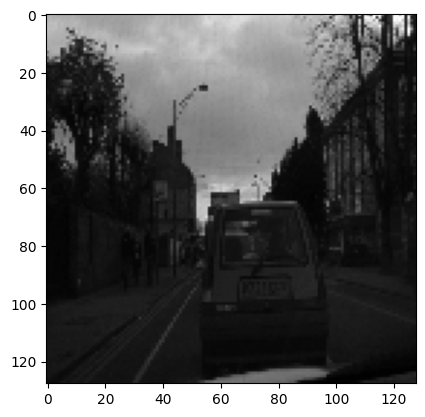

In [ ]:
img1 = cv2.cvtColor(train_data['img'][1], cv2.COLOR_BGR2GRAY) # Converting image to grayscale
plt.imshow(img1, cmap='gray')

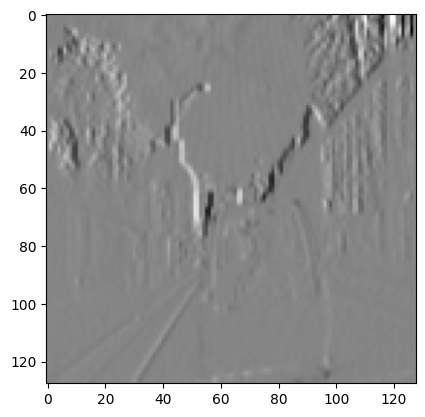

In [ ]:
### SHARPENING FILTERS
# Applying Sobel Filter in X-direction
Gx = cv2.Sobel(img1, -2, 1, 0, 7)
plt.imshow(Gx, cmap='gray')

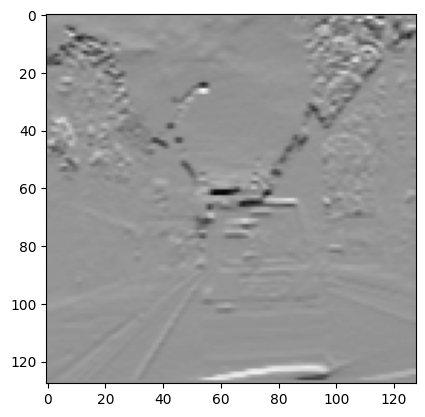

In [ ]:
# Applying Sobel Filter in Y-direction
Gy = cv2.Sobel(img1,-1,0, 1, 3)
plt.imshow(Gy, cmap='gray')

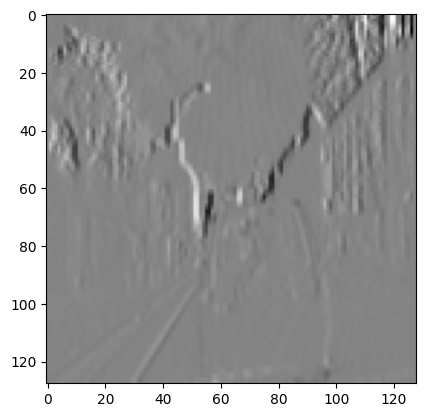

In [ ]:
# Applying Prewitt Filter
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # Kernel for Prewitt filter
prewitt = cv2.filter2D(img1, -1, kernel)
plt.imshow(prewitt, cmap='gray')

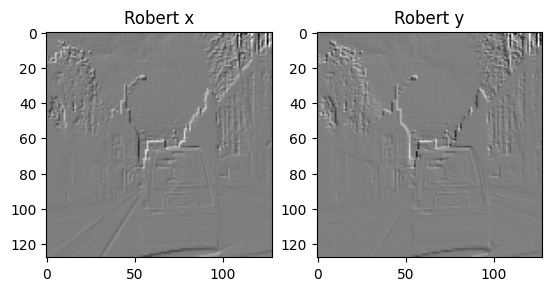

In [ ]:
# Applyin Robert Filter in X and Y directions
kernel_x = np.array([[1,0],[0,-1]]) # Kernel for Robert-X filter
kernel_y = np.array([[0,1],[-1,0]]) # Kernel for Robert-Y filter
robert_x = cv2.filter2D(img1, -1, kernel_x)
robert_y = cv2.filter2D(img1, -1, kernel_y)
plt.subplot(1,2,1)
plt.title('Robert x')
plt.imshow(robert_x, cmap='gray')
plt.subplot(1,2,2)
plt.title('Robert y')
plt.imshow(robert_y, cmap='gray')
plt.show()

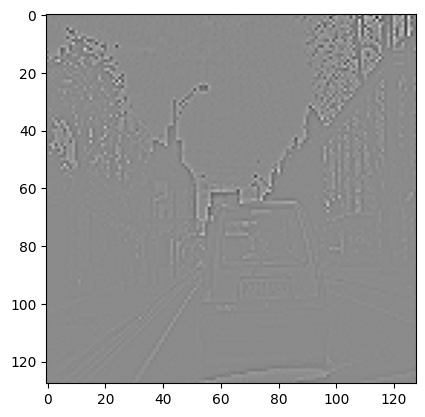

In [ ]:
# Applying Laplacian filter
laplacian = filters.laplace(img1)
plt.imshow(laplacian, cmap='gray')

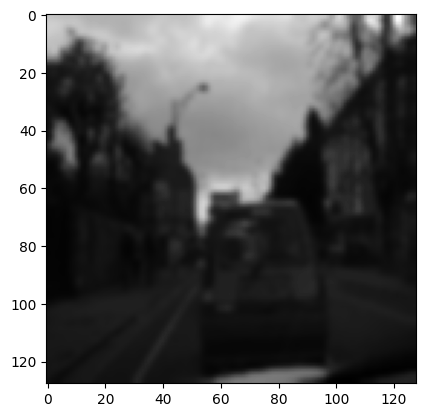

In [ ]:
### SMOOTHENING FILTERS
# Applying Gaussian Blur
gaussian = cv2.GaussianBlur(img1, (5, 5), 0)
plt.imshow(gaussian, cmap='gray')

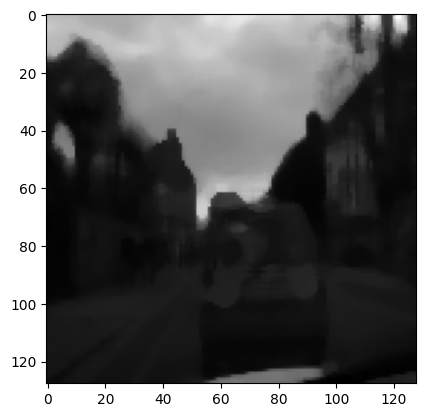

In [ ]:
# Apply the median filter
kernel_size = 5
median_filtered_image = cv2.medianBlur(img1, kernel_size)
plt.imshow(median_filtered_image, cmap='gray')

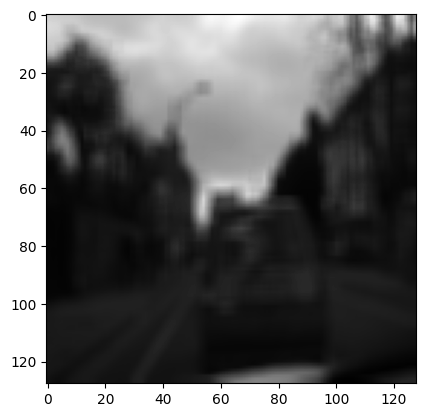

In [ ]:
# Apply the mean filter (average filter)
kernel_size = (5, 5)
mean_filtered_image = cv2.blur(img1, kernel_size)
plt.imshow(mean_filtered_image, cmap='gray')

In [ ]:
# Comparing the PSNR Values of the Sharpening filters to find the best Sharpening filter for our image
psnr_sharpening = {
    'Sobel_x': cv2.PSNR(img1, Gx),
    'Sobel_y': cv2.PSNR(img1, Gy),
    'Prewitt': cv2.PSNR(img1, prewitt),
    'Robert_x': cv2.PSNR(img1, robert_x),
    'Robert_y': cv2.PSNR(img1, robert_y),
    'Laplacian': cv2.PSNR(img1, laplacian),
}

print(f'Sharpening techniques and their respective PSNR Values are:\n{psnr_sharpening}')

Sharpening techniques and their respective PSNR Values are:
{'Sobel_x': 54.404571837993544, 'Sobel_y': 54.843167220503055, 'Prewitt': 55.51620304133604, 'Robert_x': 56.98493271699292, 'Robert_y': 57.34447973333001, 'Laplacian': 56.836261307692496}


In [ ]:
print(f"PSNR Value of Robert in y direction is highest amongst the edge detection filters: {psnr_sharpening['Robert_y']}\nIt is hence the best filter for edge detection/sharpening of our image")

PSNR Value of Robert in y direction is highest amongst the edge detection filters: 57.34447973333001
It is hence the best filter for edge detection/sharpening of our image


In [ ]:
# Comparing the PSNR Values of the Smoothening filters to find the best Smoothening filter for our image
psnr_smoothening = {
    'Gaussian': cv2.PSNR(img1, gaussian),
    'Mean Filter': cv2.PSNR(img1, mean_filtered_image),
    'Median FIlter': cv2.PSNR(img1, median_filtered_image),
}

print(f'Smoothening techniques and their respective PSNR Values are:\n{psnr_smoothening}')

Smoothening techniques and their respective PSNR Values are:
{'Gaussian': 74.51603638704145, 'Mean Filter': 72.69665351469018, 'Median FIlter': 73.05785216761177}


In [ ]:
print(f"PSNR Value of Gaussian Filtering is: {psnr_smoothening['Gaussian']}\nGaussian Filter is hence the best filter for smoothening of our image")

PSNR Value of Gaussian Filtering is: 74.51603638704145
Gaussian Filter is hence the best filter for smoothening of our image


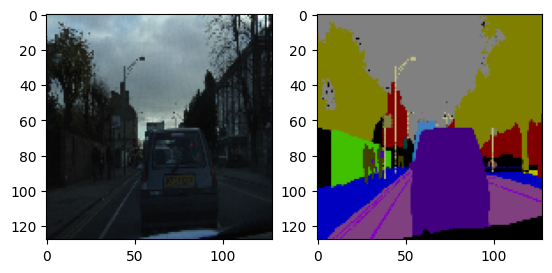

In [ ]:
## Displaying data loaded by our function
plt.subplot(1,2,1)
plt.imshow(train_data['img'][1])
plt.subplot(1,2,2)
plt.imshow(train_data['mask'][1])
plt.show()

In [ ]:
### Building a Convolutional Neural Network (2D)
def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)

    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x =tf.keras.layers.Activation('relu')(x)

    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)

    return x

#inputs = tf.keras.layers.Input((128, 128, 3))
#model = Conv2dBlock(inputs, numFilters = 16, kernelSize = 3, doBatchNorm = True)
#model.compile(optimizer='adam',
 #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #            metrics=['accuracy'])

In [ ]:
# Building a U-net model for our data
def Unet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # Defining encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)

    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)

    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)

    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)

    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    # Defining decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c6)

    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)

    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)

    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)

    output = tf.keras.layers.Conv2D(3, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model

# Instantiating our model
inputs = tf.keras.layers.Input((128, 128, 3))
myTransformer = Unet(inputs, droupouts=0.7)
myTransformer.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
# Training our model
retVal = myTransformer.fit(np.array(train_data['img']), np.array(train_data['mask']), epochs = 50, verbose = 0)

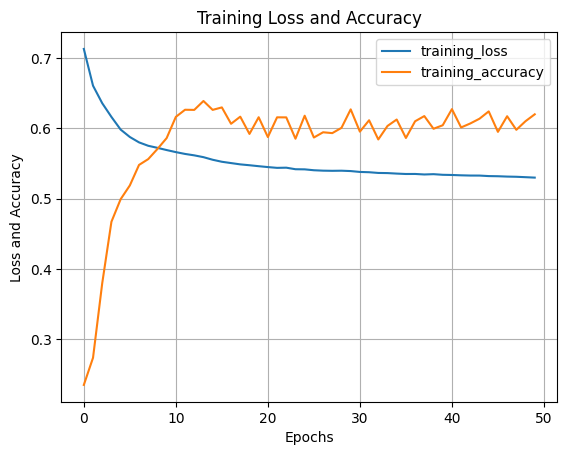

In [ ]:
# Plotting the training loss and training accuracy of our model
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.plot(retVal.history['accuracy'], label = 'training_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
## Function for getting 16 predictions
def predict16 (valMap, model, shape = 256):
    ## getting and proccessing val data
    img = valMap['img']
    mask = valMap['mask']
    mask = mask[0:16]

    imgProc = img [0:16]
    imgProc = np.array(img)

    predictions = model.predict(imgProc)
    for i in range(len(predictions)):
        predictions[i] = cv2.merge((predictions[i,:,:,0],predictions[i,:,:,1],predictions[i,:,:,2]))

    return predictions, imgProc, mask




def Plotter(img, predMask, groundTruth):
    plt.figure(figsize=(7,7))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('image')

    plt.subplot(1,3,2)
    plt.imshow(predMask)
    plt.title('Predicted Mask')

    plt.subplot(1,3,3)
    plt.imshow(groundTruth)
    plt.title('actual Mask')

In [ ]:
sixteenPrediction, actuals, masks = predict16(val_data, myTransformer)

4/4 [==============================] - 5s 1s/step


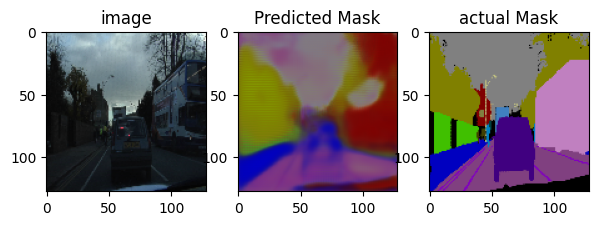

In [ ]:
Plotter(actuals[1], sixteenPrediction[1], masks[1])

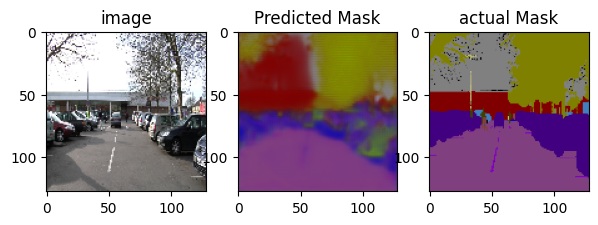

In [ ]:
Plotter(actuals[10], sixteenPrediction[10], masks[10])

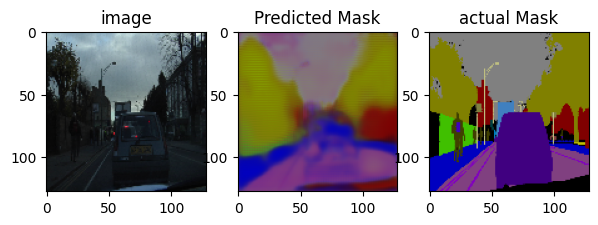

In [ ]:
Plotter(actuals[4], sixteenPrediction[3], masks[3])

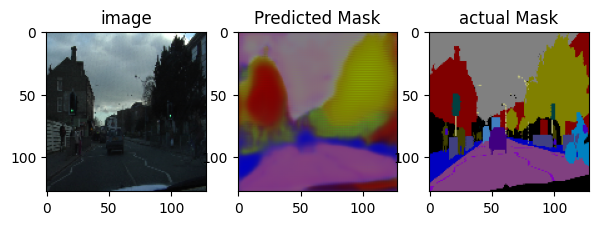

In [ ]:
Plotter(actuals[8], sixteenPrediction[8], masks[8])